In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import numpy as np
%matplotlib inline

### cx =(1+ap+bp2)y

In [2]:
a = -2
c = 1
b = 4

Вычислите передаточную фунцию

In [3]:
transfer_function = signal.lti([c], [b, a, 1])
transfer_function

TransferFunctionContinuous(
array([0.25]),
array([ 1.  , -0.5 ,  0.25]),
dt: None
)

### С помощью scipy.signal вычислите, как меняются полюсы системы при изменении указанного параметра (b)

In [4]:
p_num = 101
vs = np.linspace(1, 7, p_num)

Ps = np.empty(p_num)
for i in range(p_num):
 # рассчитываем нули, полюсы и усиление для проверяемой системы
 z,p,k = signal.tf2zpk([c], [vs[i], a, 1])
 # полюс всегда гарантированно один, поэтому сохраняем его
 Ps[i] = p[0]

C:\Users\fruit\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


For R==1.00 P==(1.00, 0.00)
For R==1.60 P==(0.62, 0.00)
For R==2.20 P==(0.45, 0.00)
For R==2.80 P==(0.36, 0.00)
For R==3.40 P==(0.29, 0.00)
For R==4.00 P==(0.25, 0.00)
For R==4.60 P==(0.22, 0.00)
For R==5.20 P==(0.19, 0.00)
For R==5.80 P==(0.17, 0.00)
For R==6.40 P==(0.16, 0.00)
For R==7.00 P==(0.14, 0.00)


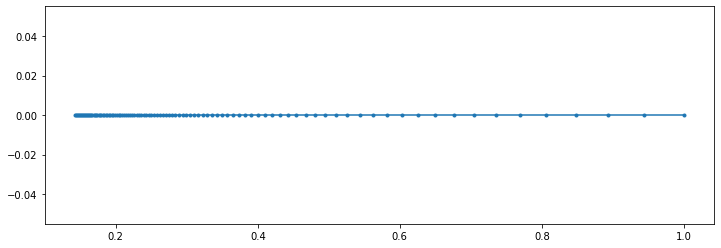

In [5]:
plt.figure(figsize=(12,4))
plt.plot(np.real(Ps), np.imag(Ps), '.-')

for i in range(0,p_num,10):
    print('For R=={0:.2f} P==({1:.2f}, {2:.2f})'.format(vs[i], 
                                                        Ps[i].real, Ps[i].imag))
plt.show()

### Проверьте, какова будет реакция системы, если подать конечный сигнал на неё при параметре, делающем её устойчивой.

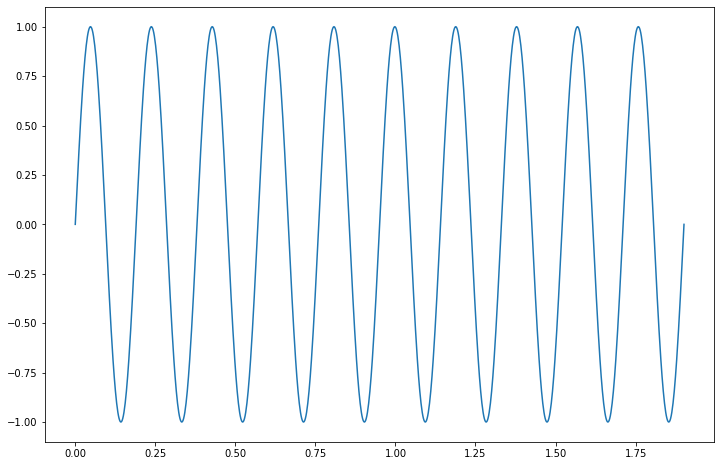

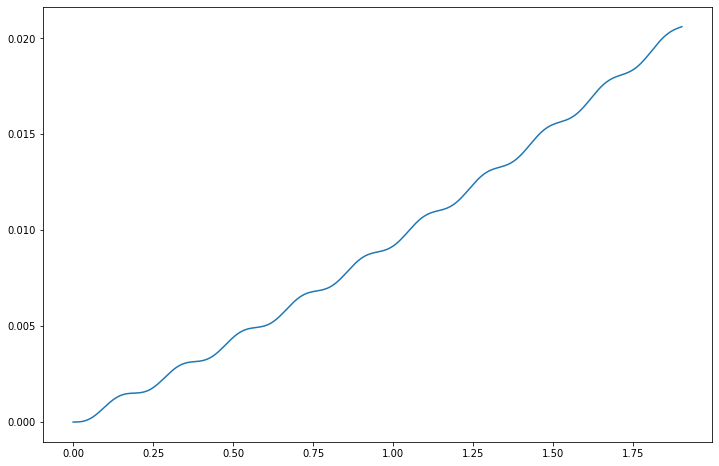

In [6]:
freq = 5.26
T = np.linspace(0, 10.0/freq, 1001)
S = [math.sin(t*2*math.pi*freq) for t in T]

Tout, yout, xout = signal.lsim(transfer_function, S, T)
plt.figure(figsize=(12,8))
plt.plot(T, S)
plt.figure(figsize=(12,8))
plt.plot(Tout, yout)
#plt.title('Output signal.')
plt.show()

### Постройте графики АЧХ и ФЧХ для двух систем, описанных в пункте выше. 

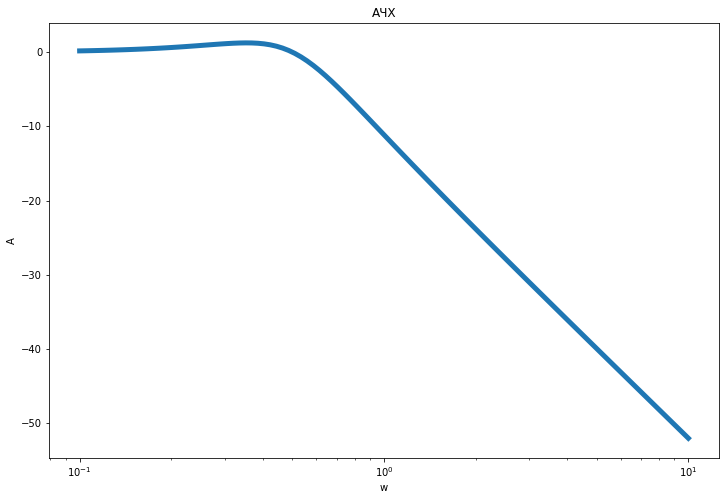

In [7]:
W, mag, phase = signal.bode(transfer_function)
plt.figure(figsize=(12,8))
plt.xlabel('w')
plt.ylabel('A')
plt.title('АЧХ')
plt.semilogx(W, mag, linewidth=5)

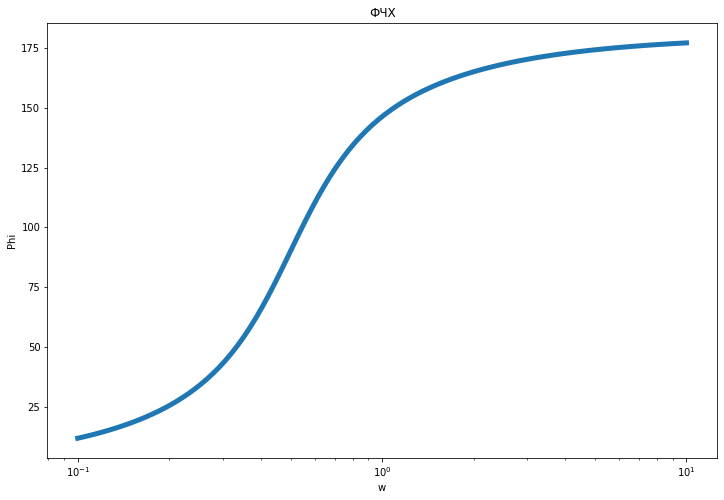

In [8]:
plt.figure(figsize=(12,8))
plt.title('ФЧХ')
plt.xlabel('w')
plt.ylabel('Phi')
plt.semilogx(W, phase, linewidth=5)
plt.show()

### W1(s) = W(s) / (1 + W(s) * R(s))
### Пусть R(s) = 1
### (c/(1+as+bs^2))/(1+(c/(1+as+bs^2)

In [9]:
transfer_function = signal.lti([c], [b, a, 1 + c])
transfer_function

TransferFunctionContinuous(
array([0.25]),
array([ 1. , -0.5,  0.5]),
dt: None
)

In [10]:
p_num = 101
vs = np.linspace(1, 7, p_num)

Ps = np.empty(p_num)
for i in range(p_num):
 # рассчитываем нули, полюсы и усиление для проверяемой системы
 z,p,k = signal.tf2zpk([c], [vs[i], a, 2])
 # полюс всегда гарантированно один, поэтому сохраняем его
 Ps[i] = p[0]

C:\Users\fruit\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


For R==1.00 P==(1.00, 0.00)
For R==1.60 P==(0.62, 0.00)
For R==2.20 P==(0.45, 0.00)
For R==2.80 P==(0.36, 0.00)
For R==3.40 P==(0.29, 0.00)
For R==4.00 P==(0.25, 0.00)
For R==4.60 P==(0.22, 0.00)
For R==5.20 P==(0.19, 0.00)
For R==5.80 P==(0.17, 0.00)
For R==6.40 P==(0.16, 0.00)
For R==7.00 P==(0.14, 0.00)


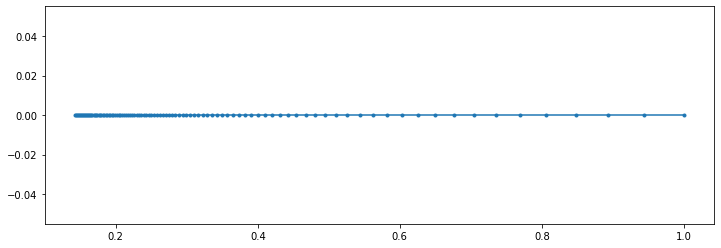

In [11]:
plt.figure(figsize=(12,4))
plt.plot(np.real(Ps), np.imag(Ps), '.-')

for i in range(0,p_num,10):
    print('For R=={0:.2f} P==({1:.2f}, {2:.2f})'.format(vs[i], 
                                                        Ps[i].real, Ps[i].imag))
plt.show()

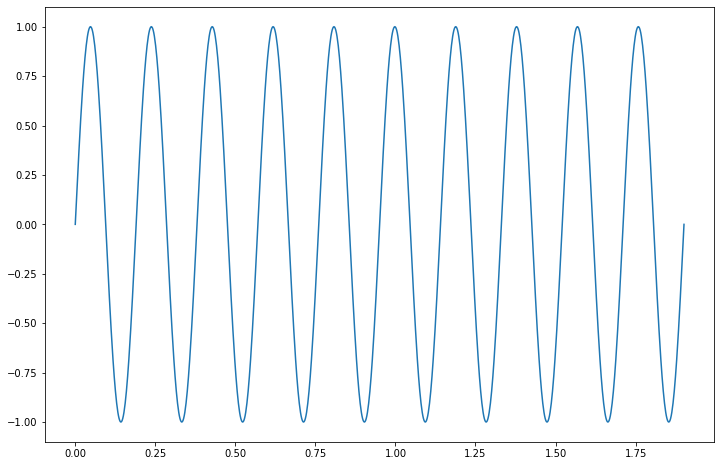

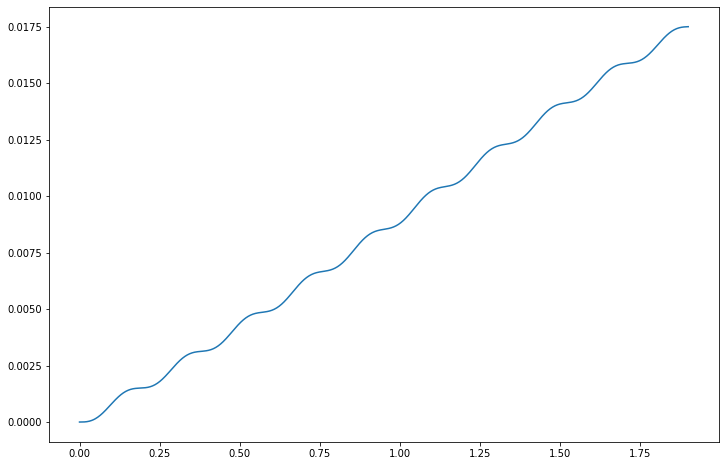

In [12]:
freq = 5.26
T = np.linspace(0, 10.0/freq, 1001)
S = [math.sin(t*2*math.pi*freq) for t in T]

Tout, yout, xout = signal.lsim(transfer_function, S, T)
plt.figure(figsize=(12,8))
plt.plot(T, S)
plt.figure(figsize=(12,8))
plt.plot(Tout, yout)
#plt.title('Output signal.')
plt.show()

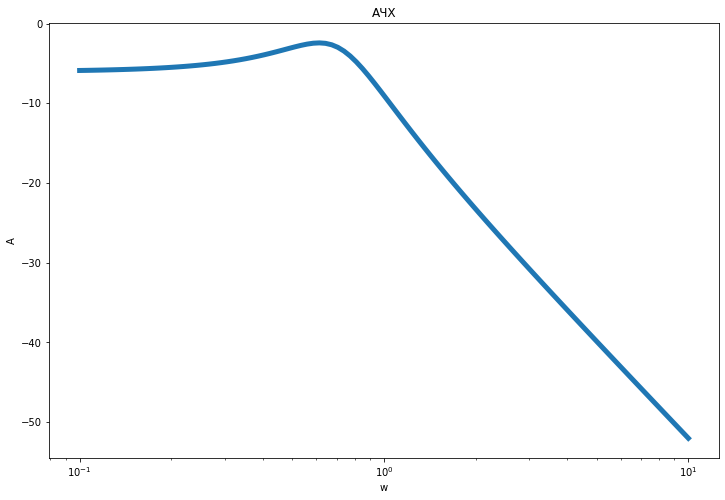

In [13]:
W, mag, phase = signal.bode(transfer_function)
plt.figure(figsize=(12,8))
plt.xlabel('w')
plt.ylabel('A')
plt.title('АЧХ')
plt.semilogx(W, mag, linewidth=5)

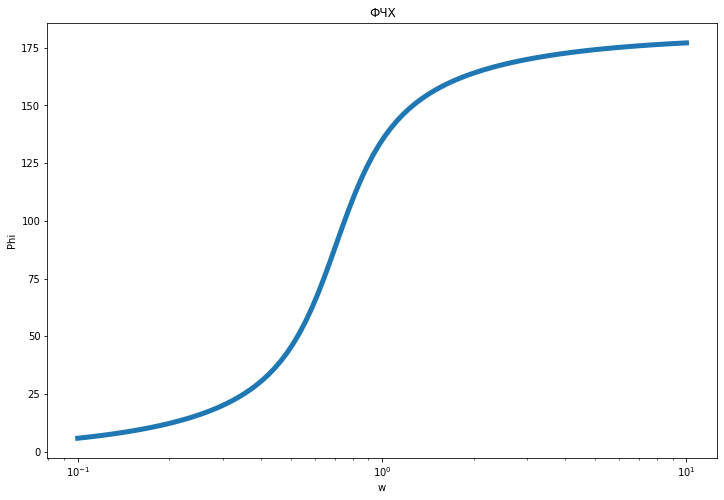

In [14]:
plt.figure(figsize=(12,8))
plt.title('ФЧХ')
plt.xlabel('w')
plt.ylabel('Phi')
plt.semilogx(W, phase, linewidth=5)
plt.show()